According to Newton's law of universal gravitation, the gravitational force \( F \) between two masses \( M \) (Earth) and \( m \) (object) separated by a distance \( R+h \)  where R is raidus of the Earth and h is height of the object above Earth's surface is given by:

\begin{align}
F(h) = G \frac{M m}{(R + h)^2}
\end{align}

The gravitational force F(h) is also equal to the: $F(h) = m g(h)$


Setting these expressions for F(h) equal to each other, we get:
\begin{align}
g = G \frac{M}{R^2}
\end{align}

Substituting $ G*M= g*R^2 $ into the equation 1 for g(h) we get:
\begin{align}
g(h) = \frac{g R^2}{(R + h)^2}
\end{align}

$$

The Euler integration method is a simple numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. For an ODE of the form:
\begin{equation}
\frac{dy}{dt} = f(t, y)
\end{equation}
with initial condition $ y(t_0) = y_0 $, the Euler method updates the value of $y $ over a small time step $\Delta t $ as follows:
\begin{equation}
y_{n+1} = y_n + \Delta t \cdot f(t_n, y_n)
\end{equation}
where $ y_n $ is the value of $ y $ at time step $n$, and $ t_n = t_0 + n \Delta t$.


For a falling body with height-dependent gravitational field and velocity-dependent damping, we have two coupled first-order ODEs:
\begin{align}
\frac{dy}{dt} &= v \\
\frac{dv}{dt} &= -g(h) +\frac{ k v^2}{m}
\end{align}
where $ y $ is the height, $ v $ is the velocity, $ g(h) = g \left( \frac{R}{R + h} \right)^2 $ is the height-dependent gravitational acceleration, and $ k $ is the damping coefficient.

The Euler integration steps for this problem are:
\begin{align}
y_{n+1} &= y_n + \Delta t \cdot v_n \\
v_{n+1} &= v_n + \Delta t \cdot \left( -g(h_n) + \frac{k v_n^2}{m} \right)
\end{align}

Initial initial conditions and parameters are : gravitational acceleration at the Earth's surface $g$, the Earth's radius $R$, the damping coefficient $k$, the mass of the body $m$, the initial height $h_0$​, and the initial velocity $v_0$​. The time step $Δt$ is and the total simulation time are defined as well.

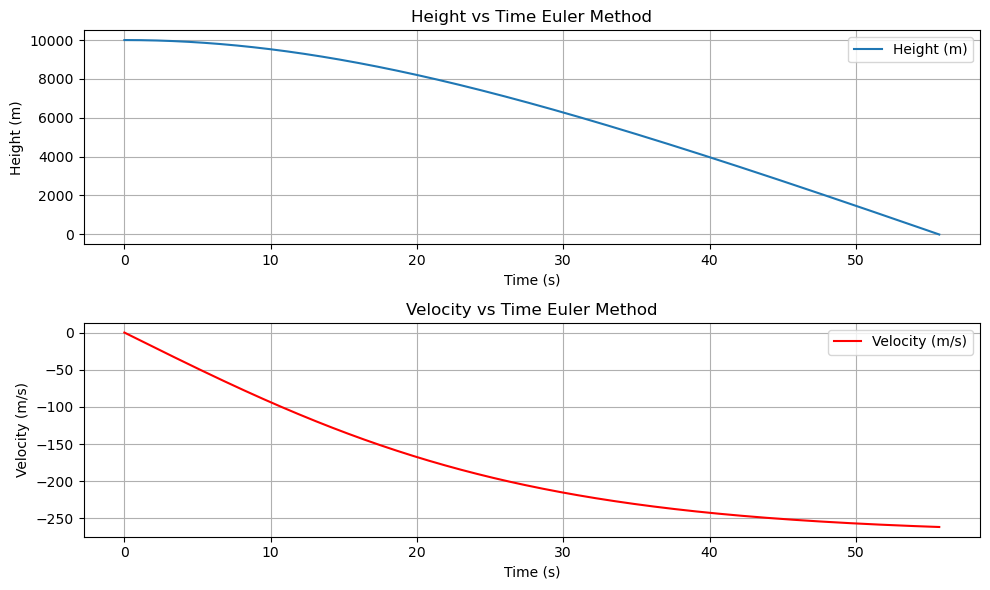

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R=6371000  # in meters, radius of the Earth
G=9.81  # m/s^2, gravitational acceleration at the surface of the Earth
k=2e-4  # kg/m, damping coefficient
m=1.5  # kg, mass of the falling body

# Initial conditions
v0=0  # initial velocity
h0=10000  #initial height
dt=0.1  #time step
t_max=1000  #maximum time


t_list=[0]
h_list=[h0]
v_list=[v0]

def euler_step(h, v, dt):
    g =G*(R/(R+h))**2
    dv=-g*dt-k*v*abs(v)*dt/m
    dh = v * dt
    return h + dh, v + dv

# Euler integration loop
t = 0
while t < t_max and h_list[-1] > 0:
    h, v = euler_step(h_list[-1], v_list[-1], dt)
    t += dt
    t_list.append(t)
    h_list.append(h)
    v_list.append(v)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_list, h_list, label='Height (m)')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time Euler Method')
plt.grid(True)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list, v_list, label='Velocity (m/s)', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.title('Velocity vs Time Euler Method')
plt.grid(True)
plt.tight_layout()
plt.show()


The Euler method provides a numerical solution to the height and velocity of the falling body. The plots generated from the simulation show how the height decreases and the velocity increases initially due to gravity, and then the velocity stabilizes due to the damping effect. Damping effect is getting significant enought to counteract further acceleration when velocity of the object increases.

                                                    Part 2, The Euler-Richardson method


The Euler-Richardson method is an improvement over the simple Euler method for numerically solving differential equations. It is a second-order method that provides better accuracy by counting an intermediate step.

The general approach for Euler-Richardson method is the following:
    Calculating the midpoint step:
        $$ \begin{align}
    y_{\text{half}} &= y_n + \frac{\Delta t}{2} f(t_n, y_n) \\
    v_{\text{half}} &= v_n + \frac{\Delta t}{2} a(t_n, y_n, v_n)
    \end{align}$$
Where y is coordinate, v is velocity, a is acceleration and $\Delta t$ is time.
Final values can be calculated using intermediate values:
$$\begin{align}
    y_{n+1} &= y_n + \Delta t \, f\left(t_n + \frac{\Delta t}{2}, y_{\text{half}}\right) \\
    v_{n+1} &= v_n + \Delta t \, a\left(t_n + \frac{\Delta t}{2}, y_{\text{half}}, v_{\text{half}}\right)
    \end{align}$$


Where:
- $ y_n $ and $ v_n $ are the position and velocity at the current step $ n $.
- $ \Delta t $ is the time step.
- $ f(t, y) $ represents the rate of change of position (which is the velocity).
- $ a(t, y, v) $ represents the acceleration.

If we use equations of motion for falling body, intermediate and final steps will be calculated as follows:


$$
\begin{align}
y_{\text{half}} &= y_n + \frac{\Delta t}{2} v_n \\
v_{\text{half}} &= v_n - \frac{\Delta t}{2} g(y_n)
\end{align}  
$$

Use the intermediate values to update the final values:

$$
\begin{align}
y_{n+1} &= y_n + \Delta t \, v_{\text{half}} \\
v_{n+1} &= v_n - \Delta t \, g(y_{half})
\end{align}
$$

Where:
- $ y_n $ and $ v_n $ are the height and velocity at the current time step $ n $.
- $ y_{\text{half}} $ and $ v_{half} $ are the height and the velocity at midpoint.

Euler-Richardson method provides a more accurate estimate of the position and velocity at each time step compared to the simple Euler method.


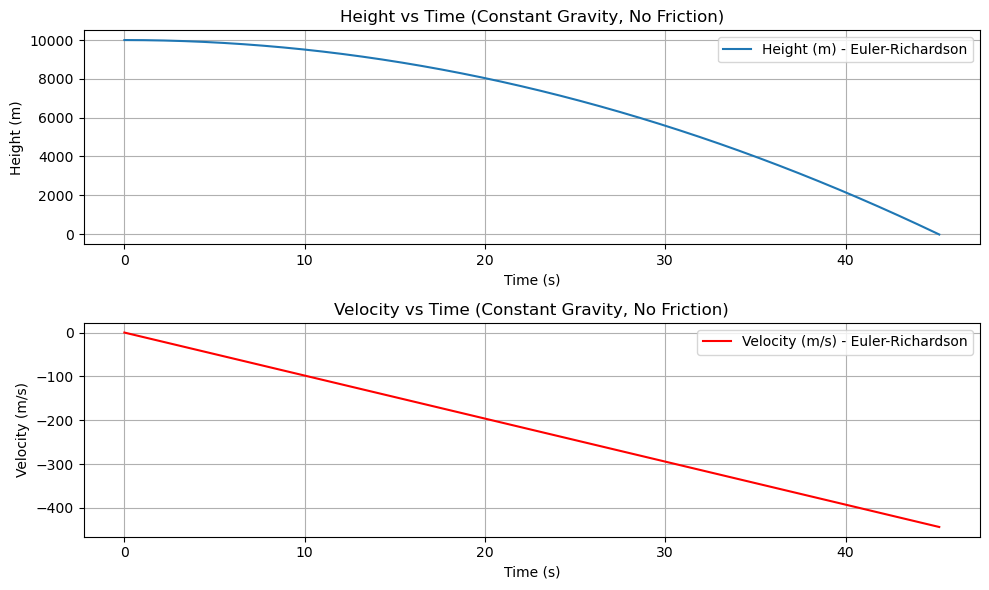

In [7]:
def euler_richardson_step_constant(h, v, dt):
    g=G
    # Midpoint values
    v_mid=v+0.5*(-g)*dt
    h_mid =h+0.5*v*dt
    # Full step
    dv=(-g)*dt
    dh=v_mid*dt
    return h+dh, v+dv


t_list_er_constant = [0]
h_list_er_constant = [h0]
v_list_er_constant = [v0]

t = 0
while t < t_max and h_list_er_constant[-1] > 0:
    h, v = euler_richardson_step_constant(h_list_er_constant[-1], v_list_er_constant[-1], dt)
    t += dt
    t_list_er_constant.append(t)
    h_list_er_constant.append(h)
    v_list_er_constant.append(v)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_list_er_constant, h_list_er_constant, label='Height (m) - Euler-Richardson')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time (Constant Gravity, No Friction)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_list_er_constant, v_list_er_constant, label='Velocity (m/s) - Euler-Richardson', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time (Constant Gravity, No Friction)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
